# Packages

In [1]:
# Packages
import pandas as pd
import numpy as np
import collections
from IPython.display import display, display_html

# Standard plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Import other jupyter notebooks
from ipynb.fs.full.functions_data_manipulation import *

sns.set_style("whitegrid")

# Data

In [2]:
# read in meta data
meta = pd.read_csv("meta_data.csv")
display_html(meta)

,Sample,Site,Year,k13Class,crt_class
0,PD0498-C,ETH,2011,R539T,no_nea
1,PD0500-C,ETH,2011,C580Y,no_nea
2,PD0501-C,ETH,2011,C580Y,no_nea
3,PD0502-C,ETH,2011,R539T,no_nea
4,PD0575-C,ETH,2012,R539T,no_nea
...,...,...,...,...,...
1463,RCN13097,NEKH,2017,C580Y,T93S
1464,RCN13098,NEKH,2017,C580Y,T93S
1465,RCN13100,NEKH,2018,C580Y,T93S
1466,RCN13101,NEKH,2018,WT,H97Y


In [3]:
# Main data, rename 'Probability_of_edge' to 'weight' so it is recognised as weight attribute
data = pd.read_csv("kelch_IBD_graph.csv")
data = data.rename(columns = {'Probability_of_edge':'weight', 'V1': 'source', 'V2': 'target'})

# get parasite types
codes, parasites = pd.factorize(np.concatenate((data['source'], data['target'])))
    
n = 1468            # number of parasites
n1 = data.shape[0]  # number of non-zero entries in adjacency metrix (upper triangular part) (1076778)

# add column, where parasites are indices from 0 to 1467
data['source_ind'] = codes[0:n1]
data['target_ind'] = codes[n1:(2*n1)]
data['type'] = 'undirected'

data = data.reindex(['source', 'target', 'source_ind', 'target_ind', 'weight', 'type'], axis = 1)
display(data)

,source,target,source_ind,target_ind,weight,type
0,PD0498-C,PD0500-C,0,1,0.000003,undirected
1,PD0498-C,PD0501-C,0,2,0.000004,undirected
2,PD0498-C,PD0502-C,0,3,1.000000,undirected
3,PD0498-C,PD0575-C,0,4,1.000000,undirected
4,PD0498-C,PD0578-C,0,5,0.966176,undirected
...,...,...,...,...,...,...
1076773,RCN13098,RCN13101,1464,1466,0.000124,undirected
1076774,RCN13098,RCN13103,1464,1467,0.999985,undirected
1076775,RCN13100,RCN13101,1465,1466,0.000391,undirected
1076776,RCN13100,RCN13103,1465,1467,0.880700,undirected


# Weighted Network

In [4]:
import powerlaw

def save_plaw(degrees, title, save_name, fontsize = 18):
    '''Fit a power law distribution and plot the empirical cdf.'''
    fit = powerlaw.Fit(degrees, discrete = True)
    fit.distribution_compare('power_law', 'lognormal')
    
    plt.figure(figsize=(9,5))
    plt.title(title, fontsize = fontsize)
    
    fig = fit.plot_ccdf(linewidth=3, label='Empirical Data')
    fit.power_law.plot_ccdf(ax=fig, color='r', linestyle='--', label='Power law fit')
    fit.lognormal.plot_ccdf(ax=fig, color='g', linestyle='--', label='Lognormal fit')
    ####
    fig.set_ylabel(u"P(X ≥ x)", fontsize = fontsize)
    fig.set_xlabel("Degree (log10 scale)", fontsize = fontsize)
    handles, labels = fig.get_legend_handles_labels()
    fig.legend(handles, labels, loc=3)

    figname = 'FigLognormal'

    plt.savefig(save_name, dpi = 400, bbox_inches = 'tight')

In [5]:
# Main weighted network
G_weighted = get_G_square(data['weight'])
print(nx.info(G_weighted))

# node strength
G_weighted_degrees = [n for d,n in G_weighted.degree(weight = 'weight')]

Name: 
Type: Graph
Number of nodes: 1468
Number of edges: 929627
Average degree: 1266.5218


## Power Law

Calculating best minimal value for power law fit
/Users/kevinlam/opt/anaconda3/lib/python3.7/site-packages/powerlaw.py:1146: RuntimeWarning: invalid value encountered in log
  self.alpha = 1 + (self.n / sum(log(data / (self.xmin - .5))))
/Users/kevinlam/opt/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/kevinlam/opt/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


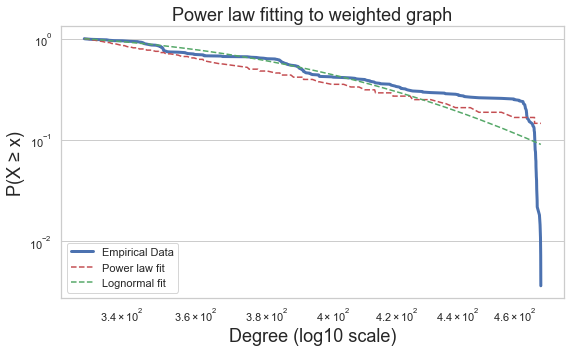

In [6]:
save_plaw(G_weighted_degrees, "Power law fitting to weighted graph", "Latex/Chapter3/weighted_power.png")

## Sampling

In [4]:
# Load data from sampling run

df_deg = pd.read_csv("Excel Files/Sampling/sampling_degree.csv")
df_clust = pd.read_csv("Excel Files/Sampling/sampling_clustering.csv")
df_centrality = pd.read_csv("Excel Files/Sampling/sampling_centrality.csv")
# df_between = pd.read_csv("Excel Files/Sampling/sampling_between.csv")
# df_close = pd.read_csv("Excel Files/Sampling/sampling_close.csv")

df_summary = pd.read_csv("Excel Files/Sampling/sampling_statistics.csv")
df_summary_lcc = pd.read_csv("Excel files/Sampling/sample_summaries_lcc.csv")

In [5]:
# Get mean and std of values
display(df_summary.describe().T.iloc[1:,1:3].round(3))
display(df_summary_lcc.describe().T.iloc[:,1:3].round(3))

,mean,std
Number of nodes,1290.830,5.840
Number of edges,92832.010,111.839
Average degree,126.474,0.152
Average local clustering coefficient,0.613,0.005
Global clustering coefficient,0.728,0.001
Density,0.086,0.000


,mean,std
No_nodes,876.270,33.010
No_edges,91571.520,284.123
avg_degree,209.284,7.553
avg_clust_local,0.727,0.006
density,0.240,0.018
transitivity,0.728,0.000


## Barplot of LCC with error bars

In [6]:
# Load files
df_lcc = df_summary_lcc['No_nodes']
df_crt = pd.read_csv("Excel Files/Sampling/sampling_lcc_crt.csv")
df_k13 = pd.read_csv("Excel Files/Sampling/sampling_lcc_k13.csv")

In [43]:
# Overall meta data count
crt_list = collections.Counter(meta['crt_class'])
k13_list = collections.Counter(meta['k13Class'])

# Prepare files for barplots
df_crt_compare = pd.DataFrame(np.vstack((df_crt.mean().values.reshape(-1,1),
                        np.array(list(crt_list.values())).reshape(-1,1))),
                        columns = ['CRT'])
df_crt_compare['CRT_class'] = list(crt_list.keys())*2
df_crt_compare['Type'] = ['LCC average']*len(crt_list) + ['Meta count']*len(crt_list)

df_k13_compare = pd.DataFrame(np.vstack((df_k13.mean().values.reshape(-1,1),
                        np.array(list(k13_list.values())).reshape(-1,1))),
                        columns = ['k13'])
df_k13_compare['k13_class'] = list(k13_list.keys())*2
df_k13_compare['Type'] = ['LCC average']*len(k13_list) + ['Meta count']*len(k13_list)

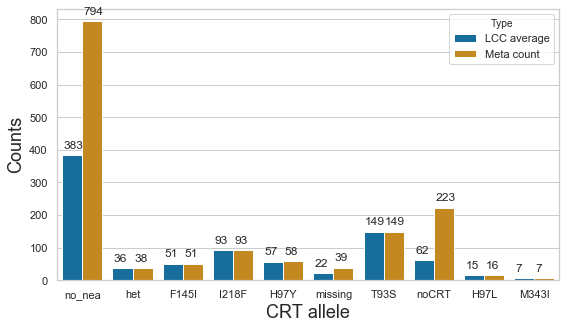

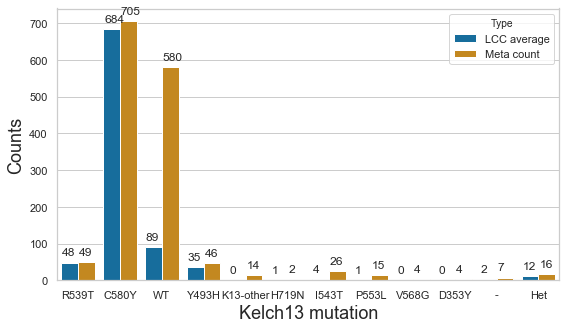

In [44]:
fontsize = 18

plt.figure(figsize = (9,5))
ax = sns.barplot(x = 'CRT_class', y = 'CRT', hue = 'Type', data = df_crt_compare, palette='colorblind')
ax.set_xlabel(xlabel = "CRT allele", fontsize = fontsize)
ax.set_ylabel(ylabel = "Counts", fontsize = fontsize)
# ax.set_title(label = "CRT counts in sampled LCC vs. meta count", fontsize = fontsize)

for i,p in enumerate(ax.patches):
        ax.annotate(np.round(p.get_height()).astype(int), (p.get_x() + 0.03, p.get_height()+20))
#         if (i < len(crt_list)):
#             plt.errorbar(x = p.get_x()+0.2,y = p.get_height(), yerr = 1.96*np.std(df_crt)[i], fmt='none', c= 'r')
plt.savefig("Latex/Chapter3/sample_crt_bar.png", dpi = 400, bbox_inches = 'tight')
plt.show()


plt.figure(figsize = (9,5))
ax = sns.barplot(x = 'k13_class', y = 'k13', hue = 'Type', data = df_k13_compare, palette='colorblind')
ax.set_xlabel(xlabel = "Kelch13 mutation", fontsize = fontsize)
ax.set_ylabel(ylabel = "Counts", fontsize = fontsize)
# ax.set_title(label = "Kelch13 counts in sampled LCC vs. meta count", fontsize = fontsize)
# ax.set(xlabel = "K13 Class", ylabel = "Counts", title = "K13 counts in largest connected component vs. meta data")
for i,p in enumerate(ax.patches):
        ax.annotate(np.round(p.get_height()).astype(int), (p.get_x() + 0.02, p.get_height()+19))
#         if (i < len(k13_list)):
#             plt.errorbar(x = p.get_x()+0.2,y = p.get_height(), yerr = 1.96*np.std(df_k13)[i], fmt='none', c= 'r')
plt.savefig("Latex/Chapter3/sample_k13_bar.png", dpi = 400, bbox_inches = 'tight')
plt.show()

## Boxplots

In [7]:
def plt_save_box(data_y, meta_cond, title, save_name):
    '''Function to create boxplots which can then be saved as png.'''
    plt.figure(figsize=(9,5))
    
    ax = sns.boxplot(x = meta_cond, y = data_y)
    ax.set_title(title, fontsize = 18)
    plt.savefig(save_name, dpi = 400, bbox_inches = 'tight')
#     plt.close()

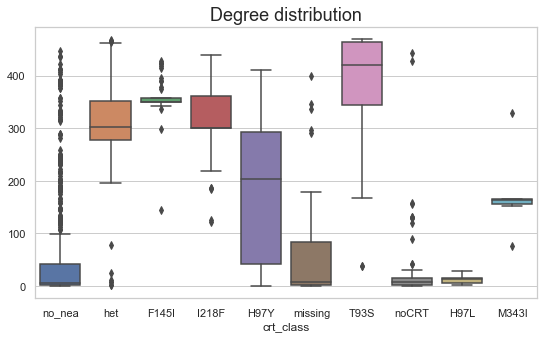

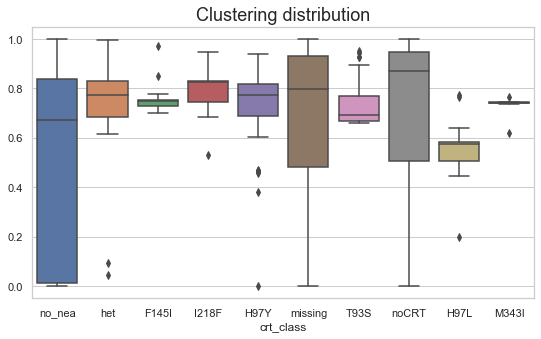

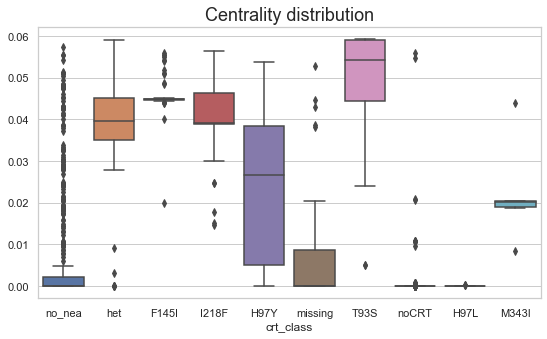

In [25]:
# Boxplots of crt_class
plt_save_box(df_deg.mean(axis = 1), meta['crt_class'], "Degree distribution",
             "Latex/Chapter3/sample_crt_degree.png")
plt_save_box(df_clust.mean(axis = 1), meta['crt_class'], "Clustering distribution",
             "Latex/Chapter3/sample_crt_clust.png")
plt_save_box(df_centrality.mean(axis = 1), meta['crt_class'], "Centrality distribution",
             "Latex/Chapter3/Appendix/sample_crt_centrality.png")

# Binary Network

In [8]:
# Load data of binary networks
df_summary = pd.read_csv("Excel files/Summaries/summary_statistics.csv")
df_lcc = pd.read_csv("Excel files/Summaries/summaries_lcc.csv")

## Progression paths

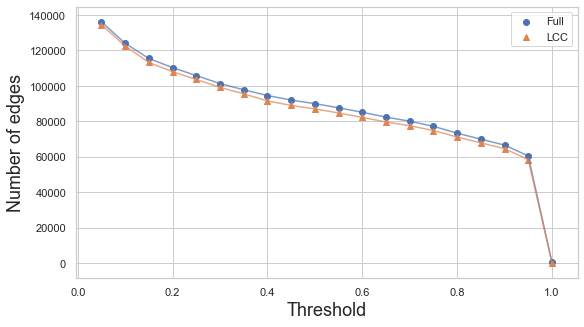

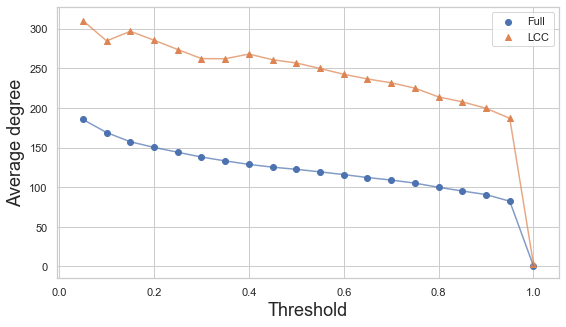

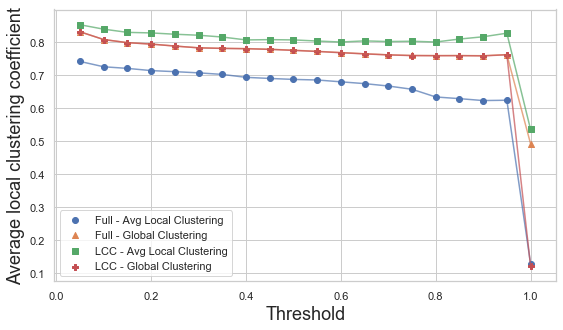

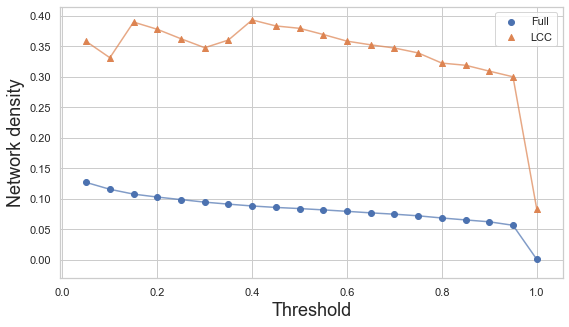

In [24]:
# Create progression plots
fontsize = 18


# Number of edges
plt.figure(figsize = (9,5))
plt.plot(df_lcc['Threshold'], df_summary['Number of edges'], alpha=0.7)
plt.scatter(df_lcc['Threshold'], df_summary['Number of edges'], label = 'Full', marker = 'o')
plt.plot(df_lcc['Threshold'], df_lcc['No_edges'], alpha=0.7)
plt.scatter(df_lcc['Threshold'], df_lcc['No_edges'], label = 'LCC', marker = '^')
plt.ylabel("Number of edges", fontsize = fontsize)
plt.xlabel("Threshold", fontsize = fontsize)
# plt.title("Number of edges, based on thresholding", fontsize = fontsize)
plt.legend()
plt.savefig("Latex/Chapter3/binary_summary_edge.png", dpi = 400, bbox_inches = 'tight')
plt.show()

# Average degree
plt.figure(figsize = (9,5))
plt.scatter(df_lcc['Threshold'], df_summary['Average degree'], label = 'Full', marker = 'o')
plt.scatter(df_lcc['Threshold'], df_lcc['avg_degree'], label = 'LCC', marker = '^')
plt.plot(df_lcc['Threshold'], df_summary['Average degree'], alpha=0.7)
plt.plot(df_lcc['Threshold'], df_lcc['avg_degree'], alpha=0.7)
plt.xlabel("Threshold", fontsize = fontsize)
plt.ylabel("Average degree", fontsize = fontsize)
# plt.title("Average degree, based on thresholding", fontsize = fontsize)
plt.legend()
plt.savefig("Latex/Chapter3/binary_summary_degree.png", dpi = 400, bbox_inches = 'tight')
plt.show()

# Average local clustering coefficient
plt.figure(figsize = (9,5))
plt.scatter(df_lcc['Threshold'], df_summary['Average local clustering coefficient'],
         label = 'Full - Avg Local Clustering', marker = 'o')
plt.scatter(df_lcc['Threshold'], df_summary['Global clustering coefficient'], label = 'Full - Global Clustering',
         marker = '^')
plt.scatter(df_lcc['Threshold'], df_lcc['avg_clust_local'], label = 'LCC - Avg Local Clustering', marker = 's')
plt.scatter(df_lcc['Threshold'], df_lcc['transitivity'], label = 'LCC - Global Clustering', marker = 'P')
plt.plot(df_lcc['Threshold'], df_summary['Average local clustering coefficient'], alpha=0.7)
plt.plot(df_lcc['Threshold'], df_summary['Global clustering coefficient'], alpha=0.7)
plt.plot(df_lcc['Threshold'], df_lcc['avg_clust_local'], alpha=0.7)
plt.plot(df_lcc['Threshold'], df_lcc['transitivity'], alpha=0.7)
plt.xlabel("Threshold", fontsize = fontsize)
plt.ylabel("Average local clustering coefficient", fontsize = fontsize)
# plt.title("Global and average local clustering coefficients, based on thresholding", fontsize = fontsize)
plt.legend()
plt.savefig("Latex/Chapter3/binary_summary_clust.png", dpi = 400, bbox_inches = 'tight')
plt.show()

# Network density
plt.figure(figsize = (9,5))
plt.scatter(df_lcc['Threshold'], df_summary['Density'], label = 'Full', marker = 'o')
plt.scatter(df_lcc['Threshold'], df_lcc['density'], label = 'LCC', marker = '^')
plt.plot(df_lcc['Threshold'], df_summary['Density'], alpha=0.7)
plt.plot(df_lcc['Threshold'], df_lcc['density'], alpha=0.7)
plt.xlabel("Threshold", fontsize = fontsize)
plt.ylabel("Network density", fontsize = fontsize)
# plt.title("Network density, based on thresholding", fontsize = fontsize)
plt.legend()
plt.savefig("Latex/Chapter3/binary_summary_density.png", dpi = 400, bbox_inches = 'tight')
plt.show()

### Node 2^i

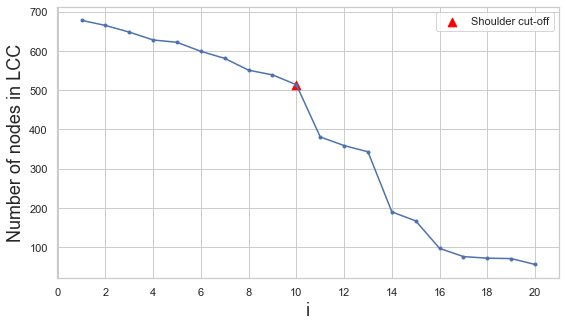

In [33]:
# Create plot for number of nodes in LCC of a thresholded graph
x = np.empty(0)
for i in range(1,21):
    G = get_G_bin(data, 1-2**-i, 'weight')
    Gc_ind = list(max(nx.connected_components(G), key=len))
    Gc = G.subgraph(Gc_ind)
    y = len(Gc)
    x = np.append(x,y)

# Plot setup
fontsize = 18
plt.figure(figsize = (9,5))
plt.plot(range(1,21),x)
plt.scatter(range(1,21),x, marker = '.')
plt.scatter(10, x[9], label = 'Shoulder cut-off', c = '#FF0000',marker='^', s = 75)
plt.legend()
plt.xticks(range(0,21,2))
plt.ylabel("Number of nodes in LCC", fontsize = fontsize)
plt.xlabel("i", fontsize = fontsize)

plt.savefig("Latex/Chapter3/shoulder.png", dpi = 400, bbox_inches = 'tight')
plt.show()

## Power Law

In [32]:
# Power law for the G_bin1
G_bin1 = get_G_bin(data, 1-2**(-10), 'weight')
G_bin1_degrees = [d for n,d in G_bin1.degree()]

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
/Users/kevinlam/opt/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/kevinlam/opt/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


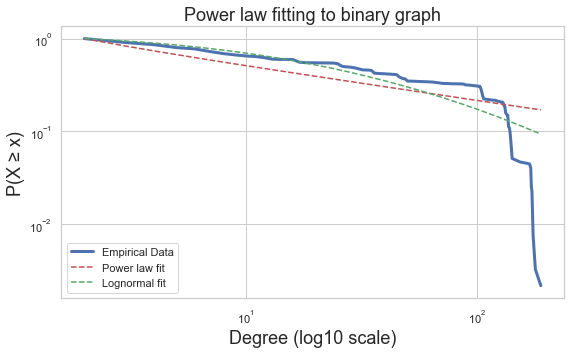

In [33]:
save_plaw(G_bin1_degrees, "Power law fitting to binary graph", "Latex/Chapter3/binary_1_power.png")

## Bar Plots

### G_bin1_lcc

In [55]:
# G_bin1 = get_G_bin(data, 1-2**(-10), 'weight')
lcc_ind = list(max(nx.connected_components(G_bin1), key=len))
G_bin1_lcc = G_bin1.subgraph(lcc_ind)

In [56]:
crt_list = collections.Counter(meta['crt_class'])
k13_list = collections.Counter(meta['k13Class'])

df_crt = pd.DataFrame(np.zeros((1,len(crt_list))), columns = crt_list.keys())
df_k13 = pd.DataFrame(np.zeros((1,len(k13_list))) , columns = k13_list.keys())

In [57]:
crt_1 = collections.Counter(meta.iloc[lcc_ind]['crt_class'])
k13_1 = collections.Counter(meta.iloc[lcc_ind]['k13Class'])

for i in crt_1.keys():
    df_crt[i] = crt_1[i]
    
for i in k13_1.keys():
    df_k13[i] = k13_1[i]

In [58]:
# Prepare files for barplot

# CRT
df_crt_compare = pd.DataFrame(np.vstack((df_crt.mean().values.reshape(-1,1),
                        np.array(list(crt_list.values())).reshape(-1,1))),
                        columns = ['CRT'])
df_crt_compare['CRT_class'] = list(crt_list.keys())*2
df_crt_compare['Type'] = ['LCC count']*len(crt_list) + ['Meta count']*len(crt_list)

# K13
df_k13_compare = pd.DataFrame(np.vstack((df_k13.mean().values.reshape(-1,1),
                        np.array(list(k13_list.values())).reshape(-1,1))),
                        columns = ['k13'])
df_k13_compare['k13_class'] = list(k13_list.keys())*2
df_k13_compare['Type'] = ['LCC count']*len(k13_list) + ['Meta count']*len(k13_list)


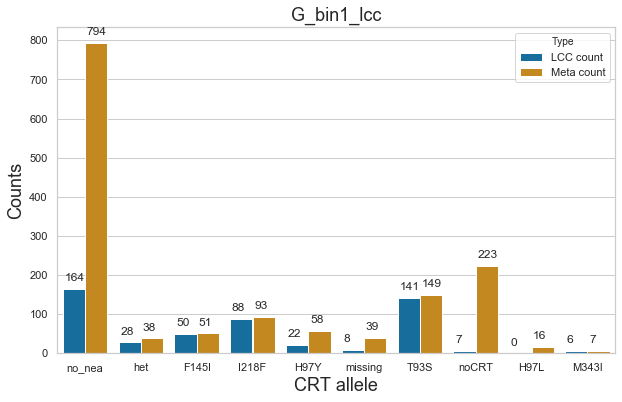

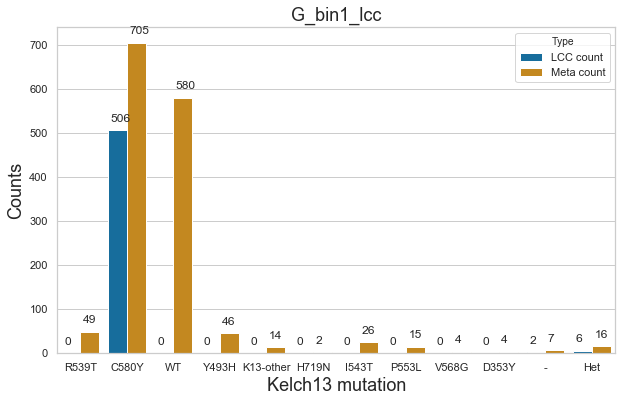

In [59]:
fontsize = 18

plt.figure(figsize = (10,6))
ax = sns.barplot(x = 'CRT_class', y = 'CRT', hue = 'Type', data = df_crt_compare, palette='colorblind')
ax.set_xlabel(xlabel = "CRT allele", fontsize = fontsize)
ax.set_ylabel(ylabel = "Counts", fontsize = fontsize)
ax.set_title(label = "G_bin1_lcc", fontsize = fontsize)
# ax.set(xlabel = "CRT allele", ylabel = "Counts", title = "CRT counts in largest connected component (G_bin1_lcc) vs. meta data")
for i,p in enumerate(ax.patches):
        ax.annotate(np.round(p.get_height()).astype(int), (p.get_x() + 0.03, p.get_height()+20))
plt.savefig("Latex/Chapter3/binary_crt_bar.png", dpi = 400, bbox_inches = 'tight')
plt.show()


plt.figure(figsize = (10,6))
ax = sns.barplot(x = 'k13_class', y = 'k13', hue = 'Type', data = df_k13_compare, palette='colorblind')
ax.set_xlabel(xlabel = "Kelch13 mutation", fontsize = fontsize)
ax.set_ylabel(ylabel = "Counts", fontsize = fontsize)
ax.set_title(label = "G_bin1_lcc", fontsize = fontsize)
# ax.set(xlabel = "K13 Class", ylabel = "Counts", title = "K13 counts in largest connected component (G_bin1_lcc) vs. meta data")
for i,p in enumerate(ax.patches):
        ax.annotate(np.round(p.get_height()).astype(int), (p.get_x() + 0.05, p.get_height()+19))
plt.savefig("Latex/Chapter3/binary_k13_bar.png", dpi = 400, bbox_inches = 'tight')
plt.show()

### G_bin50

In [60]:
G_bin50 = get_G_bin(data, 0.5, 'weight')
lcc_ind = list(max(nx.connected_components(G_bin50), key=len))
G_bin50_lcc = G_bin50.subgraph(lcc_ind)

In [61]:
crt_list = collections.Counter(meta['crt_class'])
k13_list = collections.Counter(meta['k13Class'])

df_crt = pd.DataFrame(np.zeros((1,len(crt_list))), columns = crt_list.keys())
df_k13 = pd.DataFrame(np.zeros((1,len(k13_list))) , columns = k13_list.keys())

In [62]:
crt_1 = collections.Counter(meta.iloc[lcc_ind]['crt_class'])
k13_1 = collections.Counter(meta.iloc[lcc_ind]['k13Class'])

for i in crt_1.keys():
    df_crt[i] = crt_1[i]
    
for i in k13_1.keys():
    df_k13[i] = k13_1[i]

In [63]:
# Prepare files for barplot

# CRT
df_crt_compare = pd.DataFrame(np.vstack((df_crt.mean().values.reshape(-1,1),
                        np.array(list(crt_list.values())).reshape(-1,1))),
                        columns = ['CRT'])
df_crt_compare['CRT_class'] = list(crt_list.keys())*2
df_crt_compare['Type'] = ['LCC count']*len(crt_list) + ['Meta count']*len(crt_list)

# K13
df_k13_compare = pd.DataFrame(np.vstack((df_k13.mean().values.reshape(-1,1),
                        np.array(list(k13_list.values())).reshape(-1,1))),
                        columns = ['k13'])
df_k13_compare['k13_class'] = list(k13_list.keys())*2
df_k13_compare['Type'] = ['LCC count']*len(k13_list) + ['Meta count']*len(k13_list)


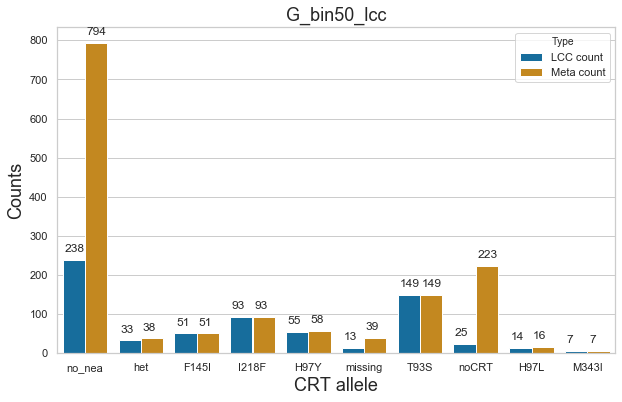

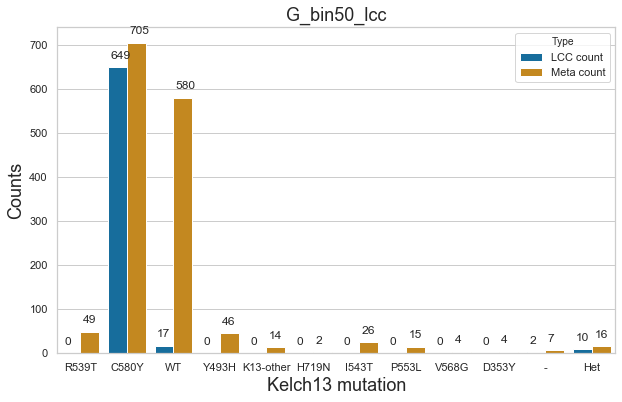

In [64]:
fontsize = 18

plt.figure(figsize = (10,6))
ax = sns.barplot(x = 'CRT_class', y = 'CRT', hue = 'Type', data = df_crt_compare, palette = 'colorblind')
ax.set_xlabel(xlabel = "CRT allele", fontsize = fontsize)
ax.set_ylabel(ylabel = "Counts", fontsize = fontsize)
ax.set_title(label = "G_bin50_lcc", fontsize = fontsize)
# ax.set(xlabel = "CRT allele", ylabel = "Counts", title = "CRT counts in largest connected component (G_bin1_lcc) vs. meta data")
for i,p in enumerate(ax.patches):
        ax.annotate(np.round(p.get_height()).astype(int), (p.get_x() + 0.03, p.get_height()+20))
plt.savefig("Latex/Chapter3/binary_crt_bar50.png", dpi = 400, bbox_inches = 'tight')
plt.show()


plt.figure(figsize = (10,6))
ax = sns.barplot(x = 'k13_class', y = 'k13', hue = 'Type', data = df_k13_compare, palette = 'colorblind')
ax.set_xlabel(xlabel = "Kelch13 mutation", fontsize = fontsize)
ax.set_ylabel(ylabel = "Counts", fontsize = fontsize)
ax.set_title(label = "G_bin50_lcc", fontsize = fontsize)
# ax.set(xlabel = "K13 Class", ylabel = "Counts", title = "K13 counts in largest connected component (G_bin1_lcc) vs. meta data")
for i,p in enumerate(ax.patches):
        ax.annotate(np.round(p.get_height()).astype(int), (p.get_x() + 0.05, p.get_height()+19))
plt.savefig("Latex/Chapter3/binary_k13_bar50.png", dpi = 400, bbox_inches = 'tight')
plt.show()

## Box Plots (G_bin50) (Appendix)

In [65]:
# Creating boxplots for G_bin50
G_meta = meta.copy()
G_meta['deg'] = 0
G_meta['clust'] = 0
G_meta['central'] = 0

G_bin50_degrees = [n for d,n in G_bin50.degree()]
G_meta.iloc[:, G_meta.columns.get_indexer(['deg'])] = G_bin50_degrees

M = nx.clustering(G_bin50)
G_meta.iloc[list(M.keys()), G_meta.columns.get_indexer(['clust'])] = list(M.values())

M = nx.eigenvector_centrality(G_bin50)
G_meta.iloc[list(M.keys()), G_meta.columns.get_indexer(['central'])] = list(M.values())



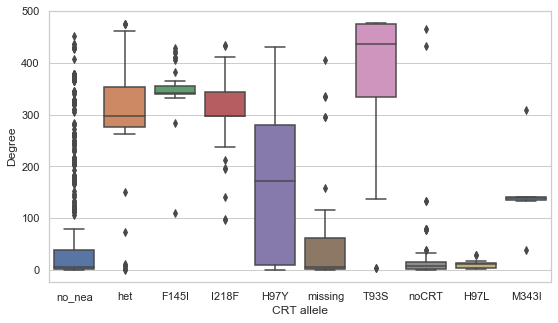

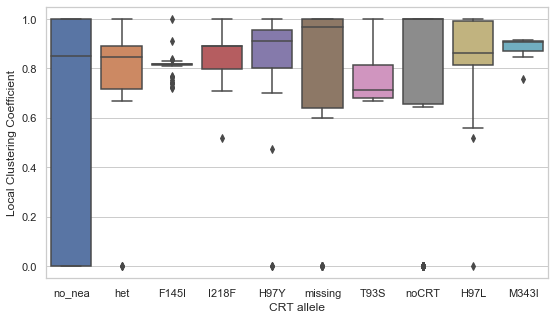

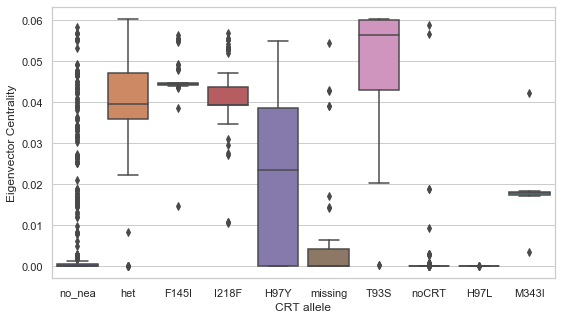

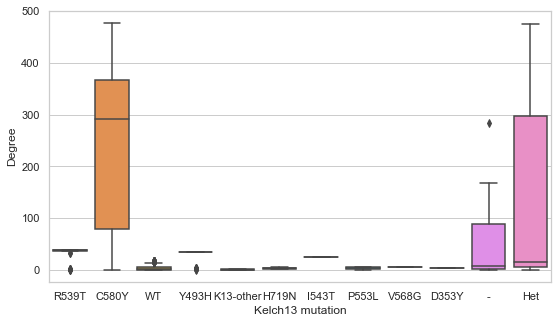

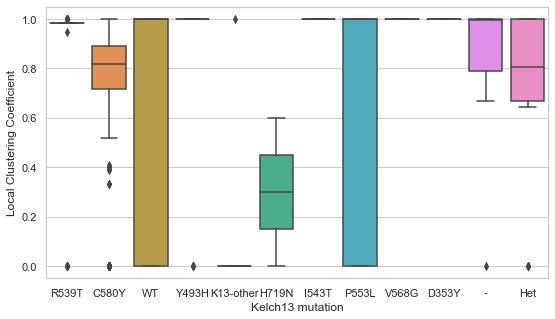

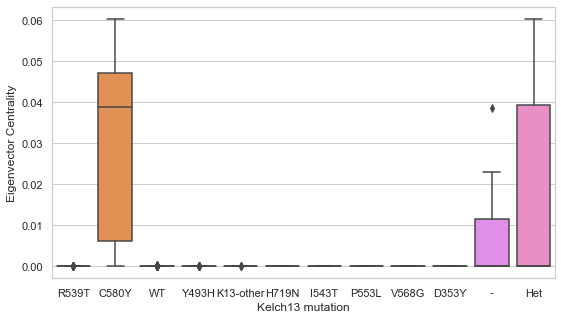

In [66]:
# Boxplot for Degree, local clustering coefficient, eigenvector centrality etc.
plt.figure(figsize = (9,5))
ax = sns.boxplot(x = meta['crt_class'], y = G_meta['deg'])
ax.set(xlabel = "CRT allele", ylabel = "Degree")
plt.savefig("Latex/Chapter3/Appendix/binary_50_crt_deg.png", dpi = 400, bbox_inches = 'tight')
plt.show()

plt.figure(figsize = (9,5))
ax = sns.boxplot(x = meta['crt_class'], y = G_meta['clust'])
ax.set(xlabel = "CRT allele", ylabel = "Local Clustering Coefficient")
plt.savefig("Latex/Chapter3/Appendix/binary_50_crt_clust.png", dpi = 400, bbox_inches = 'tight')
plt.show()

plt.figure(figsize = (9,5))
ax = sns.boxplot(x = meta['crt_class'], y = G_meta['central'])
ax.set(xlabel = "CRT allele", ylabel = "Eigenvector Centrality")
plt.savefig("Latex/Chapter3/Appendix/binary_50_crt_central.png", dpi = 400, bbox_inches = 'tight')
plt.show()

plt.figure(figsize = (9,5))
ax = sns.boxplot(x = meta['k13Class'], y = G_meta['deg'])
ax.set(xlabel = "Kelch13 mutation", ylabel = "Degree")
plt.savefig("Latex/Chapter3/Appendix/binary_50_k13_deg.png", dpi = 400, bbox_inches = 'tight')
plt.show()

plt.figure(figsize = (9,5))
ax = sns.boxplot(x = meta['k13Class'], y = G_meta['clust'])
ax.set(xlabel = "Kelch13 mutation", ylabel = "Local Clustering Coefficient")
plt.savefig("Latex/Chapter3/Appendix/binary_50_k13_clust.png", dpi = 400, bbox_inches = 'tight')
plt.show()

plt.figure(figsize = (9,5))
ax = sns.boxplot(x = meta['k13Class'], y = G_meta['central'])
ax.set(xlabel = "Kelch13 mutation", ylabel = "Eigenvector Centrality")
plt.savefig("Latex/Chapter3/Appendix/binary_50_k13_central.png", dpi = 400, bbox_inches = 'tight')
plt.show()



## Considered Networks

In [67]:
# dictionary to destringize node labels, e.g. from '4' to 4
nodes_dict = {}
for key in range(1468):
    nodes_dict[str(key)] = key

In [68]:
G_bin1 = nx.relabel_nodes(nx.read_gml("Export_Graphs/G_bin1.gml"), nodes_dict)
G_bin50 = nx.relabel_nodes(nx.read_gml("Export_Graphs/G_bin50.gml"), nodes_dict)
G_sample = nx.relabel_nodes(nx.read_gml("Export_Graphs/G_sample.gml"), nodes_dict)

G_bin1_lcc = nx.relabel_nodes(nx.read_gml("Export_Graphs/G_bin1_lcc.gml"), nodes_dict)
G_bin50_lcc = nx.relabel_nodes(nx.read_gml("Export_Graphs/G_bin50_lcc.gml"), nodes_dict)
G_sample_lcc = nx.relabel_nodes(nx.read_gml("Export_Graphs/G_sample_lcc.gml"), nodes_dict)

G_sub25 = nx.relabel_nodes(nx.read_gml("Export_Graphs/G_sub25.gml"), nodes_dict)
G_sub50 = nx.relabel_nodes(nx.read_gml("Export_Graphs/G_sub50.gml"), nodes_dict)
G_sub75 = nx.relabel_nodes(nx.read_gml("Export_Graphs/G_sub75.gml"), nodes_dict)

In [91]:
# Print info summary of networks we will consider
print("Info: \n")
print(nx.info(G_sample))
print(nx.info(G_bin50))
print(nx.info(G_bin1))
print(nx.info(G_sample_lcc))
print(nx.info(G_bin50_lcc))
print(nx.info(G_bin1_lcc))
print(nx.info(G_sub25))
print(nx.info(G_sub50))
print(nx.info(G_sub75))

print("Density: \n")
print(nx.density(G_sample))
print(nx.density(G_bin50))
print(nx.density(G_bin1))
print(nx.density(G_sample_lcc))
print(nx.density(G_bin50_lcc))
print(nx.density(G_bin1_lcc))
print(nx.density(G_sub25))
print(nx.density(G_sub50))
print(nx.density(G_sub75))

print("Average Clustering: \n")
print(nx.average_clustering(G_sample))
print(nx.average_clustering(G_bin50))
print(nx.average_clustering(G_bin1))
print(nx.average_clustering(G_sample_lcc))
print(nx.average_clustering(G_bin50_lcc))
print(nx.average_clustering(G_bin1_lcc))
print(nx.average_clustering(G_sub25))
print(nx.average_clustering(G_sub50))
print(nx.average_clustering(G_sub75))

print("Transitivity: \n")
print(nx.transitivity(G_sample))
print(nx.transitivity(G_bin50))
print(nx.transitivity(G_bin1))
print(nx.transitivity(G_sample_lcc))
print(nx.transitivity(G_bin50_lcc))
print(nx.transitivity(G_bin1_lcc))
print(nx.transitivity(G_sub25))
print(nx.transitivity(G_sub50))
print(nx.transitivity(G_sub75))

Info: 

Name: 
Type: Graph
Number of nodes: 1468
Number of edges: 92834
Average degree: 126.4768
Name: 
Type: Graph
Number of nodes: 1468
Number of edges: 90001
Average degree: 122.6172
Name: 
Type: Graph
Number of nodes: 1468
Number of edges: 24741
Average degree:  33.7071
Name: 
Type: Graph
Number of nodes: 848
Number of edges: 91253
Average degree: 215.2193
Name: 
Type: Graph
Number of nodes: 678
Number of edges: 87049
Average degree: 256.7817
Name: 
Type: Graph
Number of nodes: 514
Number of edges: 22735
Average degree:  88.4630
Name: 
Type: Graph
Number of nodes: 514
Number of edges: 86936
Average degree: 338.2724
Name: 
Type: Graph
Number of nodes: 514
Number of edges: 76095
Average degree: 296.0895
Name: 
Type: Graph
Number of nodes: 514
Number of edges: 66883
Average degree: 260.2451
Density: 

0.08621461434018897
0.08358361705012547
0.022976881028401397
0.25409603261232766
0.37929351686034607
0.17244256339075098
0.6594003382862691
0.5771725032425421
0.5073004604030613
Average 

## Visualisations

In [71]:
from matplotlib.colors import ListedColormap
my_cmap = ListedColormap(sns.color_palette('colorblind').as_hex())

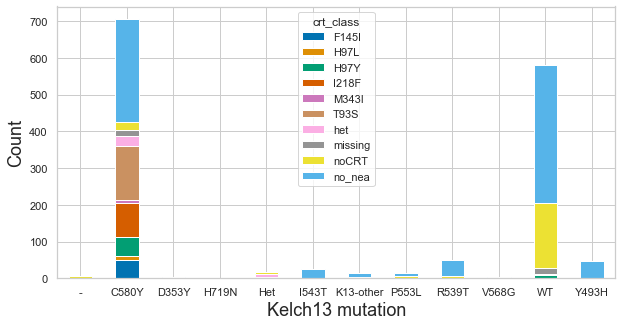

In [75]:
# G_sample_no_cluster.groupby(['crt_class', 'k13Class']).size()
fontsize = 18
sns.set_style('whitegrid')


ax = pd.crosstab(index = meta["k13Class"],
            columns=meta["crt_class"]).plot(kind = 'bar', colormap = my_cmap,
                                           stacked = True,
                                           figsize = (10,5))
ax.set_xlabel("Kelch13 mutation", fontsize = fontsize)
ax.set_ylabel("Count", fontsize = fontsize)
plt.xticks(rotation=0) 
fig = ax.get_figure()
fig.savefig("Latex/Chapter3/crt_k13_crosstab.png", dpi = 400, bbox_inches = 'tight')

In [34]:
def plt_graph_clusters(G, pos, clustering, label_dict, title, save_file, plt_size, font_size, dpi, color_bool):
    '''Plt network graph with clusters. Use plt_size = 120 for LCC, and plt_size = 200 for full network.
    Example: plt_graph_clusters(H, pos, graph_clusters, label_dict = label_dict,
                  title = "Clustering", save_file = "test_clauset.png", plt_size = 200)'''
    # get colours
    my_cmap = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple',
           'tab:brown','tab:pink','tab:olive','tab:cyan']
    my_markers = ['o', 'v', '*', 'h','s','p', 'P']
    col_list = list(itertools.product(*[my_markers, my_cmap]))
    
    # plot graph
    fig = plt.figure(figsize = (plt_size*1.2, plt_size))
    fraction = plt_size/270
    
    # Draw nodes
    for i in clustering.unique():
        # get list of nodes to colour
        nodelist = list(clustering.index[clustering == i])
        
        # colour "too long" clusters with gray diamonds
        if(i == len(col_list)):
            label = '>' + str(len(col_list))
            my_mark = 'D'
            my_col = 'gray'
        elif(i > len(col_list)):
            label = ''
            my_mark = 'D'
            my_col = 'gray'
        else:
            label = str(pd.factorize(meta['k13Class'])[1][i]) + " (" + str(len(nodelist)) + ")"
            my_mark, my_col = col_list[i]
        
        # Draw nodes within speicfic cluster
        nx.draw_networkx_nodes(G, pos = pos, nodelist = nodelist,
                               node_color = my_col, node_shape = my_mark, node_size = 3000*fraction,
                               label = label) # edgecolors = 'tan' 
    
    # Draw edges
    if (color_bool):
        # add colorbar if color_bool == True
        weights_edge = list((nx.get_edge_attributes(G, 'weight').values()))
        my_cmap = plt.get_cmap('RdYlGn')
        nx.draw_networkx_edges(G, pos = pos, width = 1.6, edge_color = weights_edge, alpha = 0.3,
                             edge_cmap = my_cmap, edge_vmin = 0, edge_vmax = 1)

        # add colorbar
        sm = plt.cm.ScalarMappable(cmap = my_cmap, norm = plt.Normalize(vmin = 0, vmax = 1))
        sm._A = []
        cbar = plt.colorbar(sm, shrink = 0.3, pad = 0.06)
        cbar.ax.tick_params(labelsize = plt_size*1.3)
        cbar.ax.set_ylabel('Probability of edge', rotation = 270,
                           fontsize = plt_size*1.2, labelpad = plt_size*1.3)
    else:
        # otherwise leave gray
        nx.draw_networkx_edges(G, pos = pos, width = 5, alpha = 0.5, edge_color = '#000000')
    
    # Add legend on the side
    lg = plt.legend(scatterpoints = 1, markerscale = 15*fraction, prop = {'size': plt_size},
               title = "Kelch13 mutation (size)", title_fontsize = plt_size*1.1,
               bbox_to_anchor = (1.004, 1.0), loc = 'upper left')
    plt.tight_layout()
    plt.title(title, fontsize = plt_size*2, pad = plt_size*1.1)
    
    # save plot
    plt.savefig(save_file, dpi = dpi, bbox_extra_artists = (lg,), bbox_inches = 'tight')
    plt.close(fig)
    
sns.set_style("white")

In [35]:
lcc_ind = list(max(nx.connected_components(G_bin1), key=len))

NameError: name 'G_bin1' is not defined

In [94]:
# convert nodes from numbers to parasite names
parasites_dict = {}
for key, value in enumerate(parasites):
    parasites_dict[key] = value
    
parasites_dict_lcc = {n: lab for n, lab in parasites_dict.items() if n in lcc_ind}

### G_sample

In [95]:
G_sample_no_cluster = meta.copy()
G_sample_no_cluster['k13Class'] = pd.factorize(meta['k13Class'])[0]
G_sample_no_cluster['crt_class'] = pd.factorize(meta['crt_class'])[0]

In [96]:
pos = nx.nx_agraph.graphviz_layout(G_sample, prog = 'neato')
label_dict = parasites_dict

# Plot characteristics
plt_size = 30
dpi = 70
font_size = 32
color_bool = False

In [97]:
# change for specific below
G = G_sample.copy()
clustering = G_sample_no_cluster['k13Class']
# clustering = G_sample_no_cluster['crt_class']
# clustering.index = lcc_ind
label_dict = parasites_dict

str_save = "Latex/Chapter3/G_sample_k13.png"
str_title = "G_sample"

plt_graph_clusters(G, pos, clustering, label_dict, str_title, str_save, plt_size, font_size, dpi, color_bool)

### G_bin1_lcc

#### CRT

In [98]:
# redefine plot function for crt class
def plt_graph_clusters(G, pos, clustering, label_dict, title, save_file, plt_size, font_size, dpi, color_bool):
    '''Plt network graph with clusters. Use plt_size = 120 for LCC, and plt_size = 200 for full network.
    Example: plt_graph_clusters(H, pos, graph_clusters, label_dict = label_dict,
                  title = "Clustering", save_file = "test_clauset.png", plt_size = 200)'''
    # get colours
    my_cmap = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple',
           'tab:brown','tab:pink','tab:olive','tab:cyan']
    my_markers = ['o', 'v', '*', 'h','s','p', 'P']
    col_list = list(itertools.product(*[my_markers, my_cmap]))
    
    # plot graph
    fig = plt.figure(figsize = (plt_size*1.2, plt_size))
    fraction = plt_size/270
    
    # Draw nodes
    for i in clustering.unique():
        # get list of nodes to colour
        nodelist = list(clustering.index[clustering == i])
        
        # colour "too long" clusters with gray diamonds
        if(i == len(col_list)):
            label = '>' + str(len(col_list))
            my_mark = 'D'
            my_col = 'gray'
        elif(i > len(col_list)):
            label = ''
            my_mark = 'D'
            my_col = 'gray'
        else:
            label = str(pd.factorize(meta['crt_class'])[1][i]) + " (" + str(len(nodelist)) + ")"
            my_mark, my_col = col_list[i]
        
        # Draw nodes within speicfic cluster
        nx.draw_networkx_nodes(G, pos = pos, nodelist = nodelist,
                               node_color = my_col, node_shape = my_mark, node_size = 3000*fraction,
                               label = label) # edgecolors = 'tan' 
    
    # Draw edges
    if (color_bool):
        # add colorbar if color_bool == True
        weights_edge = list((nx.get_edge_attributes(G, 'weight').values()))
        my_cmap = plt.get_cmap('RdYlGn')
        nx.draw_networkx_edges(G, pos = pos, width = 1.6, edge_color = weights_edge, alpha = 0.3,
                             edge_cmap = my_cmap, edge_vmin = 0, edge_vmax = 1)

        # add colorbar
        sm = plt.cm.ScalarMappable(cmap = my_cmap, norm = plt.Normalize(vmin = 0, vmax = 1))
        sm._A = []
        cbar = plt.colorbar(sm, shrink = 0.3, pad = 0.01, orientation="horizontal")
        cbar.ax.tick_params(labelsize = plt_size*1.3)

    else:
        # otherwise leave gray
        nx.draw_networkx_edges(G, pos = pos, width = 4, alpha = 0.8, edge_color = '#DCDCDC')
    
    # Add legend on the side
    lg = plt.legend(scatterpoints = 1, markerscale = 15*fraction, prop = {'size': plt_size},
               title = "CRT allele (size)", title_fontsize = plt_size*1.1,
               bbox_to_anchor = (1.004, 1.0), loc = 'upper left')
    plt.tight_layout()
    plt.title(title, fontsize = plt_size*2, pad = plt_size*1.1)
    
    # save plot
    plt.savefig(save_file, dpi = dpi, bbox_extra_artists = (lg,), bbox_inches = 'tight')
    plt.close(fig)
    
sns.set_style("white")

In [99]:
G_bin1_lcc_no_cluster = meta.copy()
G_bin1_lcc_no_cluster['crt_class'] = pd.factorize(meta['crt_class'])[0]
G_bin1_lcc_no_cluster['k13Class'] = pd.factorize(meta['k13Class'])[0]

In [100]:
# Create plot for G_bin1_lcc
pos = nx.nx_agraph.graphviz_layout(G_bin1_lcc, prog = 'neato')
label_dict = parasites_dict

# Plot characteristics
plt_size = 30
dpi = 70
font_size = 32
color_bool = False

In [101]:
# change for specific below
G = G_bin1_lcc.copy()
clustering = G_bin1_lcc_no_cluster['crt_class'][lcc_ind]
# clustering = G_bin1_lcc_no_cluster['k13Class'][lcc_ind]
# clustering.index = lcc_ind
label_dict = parasites_dict

str_save = "Latex/Chapter3/G_bin1_lcc_crt.png"
str_title = "G_bin1_lcc"

plt_graph_clusters(G, pos, clustering, label_dict, str_title, str_save, plt_size, font_size, dpi, color_bool)

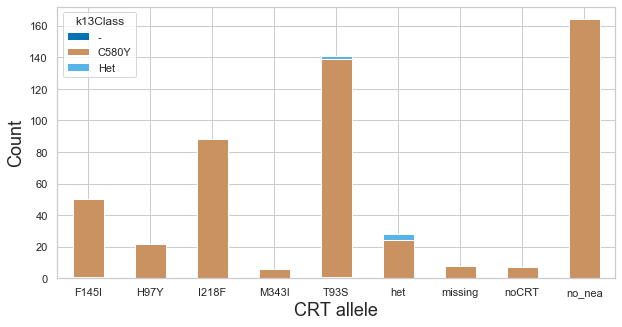

In [102]:
# G_sample_no_cluster.groupby(['crt_class', 'k13Class']).size()
fontsize = 18
sns.set_style('whitegrid')

ax = pd.crosstab(index = meta.iloc[lcc_ind,:]["crt_class"],
            columns=meta.iloc[lcc_ind,:]["k13Class"]).plot(kind = 'bar', cmap = my_cmap,
                                           stacked = True,
                                           figsize = (10,5))
ax.set_xlabel("CRT allele", fontsize = fontsize)
ax.set_ylabel("Count", fontsize = fontsize)
plt.xticks(rotation=0)
fig = ax.get_figure()
fig.savefig("Latex/Chapter3/G_bin1_lcc_crt_k13_crosstab.png", dpi = 400, bbox_inches = 'tight')

#### K13

In [103]:
# redefine function to plot graph for Kelch13
def plt_graph_clusters(G, pos, clustering, label_dict, title, save_file, plt_size, font_size, dpi, color_bool):
    '''Plt network graph with clusters. Use plt_size = 120 for LCC, and plt_size = 200 for full network.
    Example: plt_graph_clusters(H, pos, graph_clusters, label_dict = label_dict,
                  title = "Clustering", save_file = "test_clauset.png", plt_size = 200)'''
    # get colours
    my_cmap = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple',
           'tab:brown','tab:pink','tab:olive','tab:cyan']
    my_markers = ['o', 'v', '*', 'h','s','p', 'P']
    col_list = list(itertools.product(*[my_markers, my_cmap]))
    
    # plot graph
    fig = plt.figure(figsize = (plt_size*1.2, plt_size))
    fraction = plt_size/270
    
    # Draw nodes
    for i in clustering.unique():
        # get list of nodes to colour
        nodelist = list(clustering.index[clustering == i])
        
        # colour "too long" clusters with gray diamonds
        if(i == len(col_list)):
            label = '>' + str(len(col_list))
            my_mark = 'D'
            my_col = 'gray'
        elif(i > len(col_list)):
            label = ''
            my_mark = 'D'
            my_col = 'gray'
        else:
            label = str(pd.factorize(meta['k13Class'])[1][i]) + " (" + str(len(nodelist)) + ")"
            my_mark, my_col = col_list[i]
        
        # Draw nodes within speicfic cluster
        nx.draw_networkx_nodes(G, pos = pos, nodelist = nodelist,
                               node_color = my_col, node_shape = my_mark, node_size = 3000*fraction,
                               label = label) # edgecolors = 'tan' 
    
    # Draw edges
    if (color_bool):
        # add colorbar if color_bool == True
        weights_edge = list((nx.get_edge_attributes(G, 'weight').values()))
        my_cmap = plt.get_cmap('RdYlGn')
        nx.draw_networkx_edges(G, pos = pos, width = 1.6, edge_color = weights_edge, alpha = 0.3,
                             edge_cmap = my_cmap, edge_vmin = 0, edge_vmax = 1)

        # add colorbar
        sm = plt.cm.ScalarMappable(cmap = my_cmap, norm = plt.Normalize(vmin = 0, vmax = 1))
        sm._A = []
        cbar = plt.colorbar(sm, shrink = 0.3, pad = 0.01, orientation="horizontal")
        cbar.ax.tick_params(labelsize = plt_size*1.3)
    else:
        # otherwise leave gray
        nx.draw_networkx_edges(G, pos = pos, width = 4, alpha = 0.8, edge_color = '#DCDCDC')
    
    # Add legend on the side
    lg = plt.legend(scatterpoints = 1, markerscale = 15*fraction, prop = {'size': plt_size},
               title = "Kelch13 mutation (size)", title_fontsize = plt_size*1.1,
               bbox_to_anchor = (1.004, 1.0), loc = 'upper left')
    plt.tight_layout()
    plt.title(title, fontsize = plt_size*2, pad = plt_size*1.1)
    
    # save plot
    plt.savefig(save_file, dpi = dpi, bbox_extra_artists = (lg,), bbox_inches = 'tight')
    plt.close(fig)
    
sns.set_style("white")

In [104]:
G_bin1_lcc_no_cluster = meta.copy()
G_bin1_lcc_no_cluster['crt_class'] = pd.factorize(meta['crt_class'])[0]
G_bin1_lcc_no_cluster['k13Class'] = pd.factorize(meta['k13Class'])[0]

In [105]:
pos = nx.nx_agraph.graphviz_layout(G_bin1_lcc, prog = 'neato')
label_dict = parasites_dict

# Plot characteristics
plt_size = 30
dpi = 70
font_size = 32
color_bool = False

In [106]:
# change for specific below
G = G_bin1_lcc.copy()
# clustering = G_bin1_lcc_no_cluster['crt_class'][lcc_ind]
clustering = G_bin1_lcc_no_cluster['k13Class'][lcc_ind]
# clustering.index = lcc_ind
label_dict = parasites_dict

str_save = "Latex/Chapter3/Appendix/G_bin1_lcc_k13.png"
str_title = "G_bin1_lcc"

plt_graph_clusters(G, pos, clustering, label_dict, str_title, str_save, plt_size, font_size, dpi, color_bool)

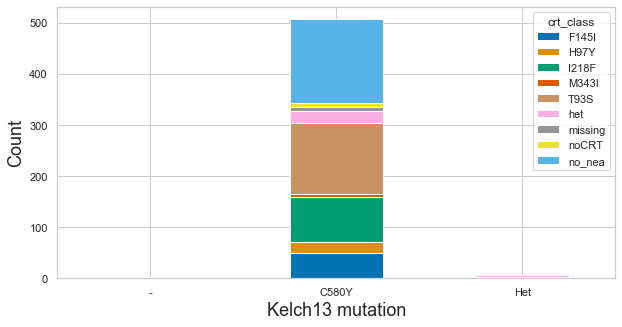

In [109]:
# G_sample_no_cluster.groupby(['crt_class', 'k13Class']).size()
fontsize = 18
sns.set_style('whitegrid')

ax = pd.crosstab(index = meta.iloc[lcc_ind,:]["k13Class"],
            columns=meta.iloc[lcc_ind,:]["crt_class"]).plot(kind = 'bar', cmap = my_cmap,
                                           stacked = True,
                                           figsize = (10,5))
ax.set_xlabel("Kelch13 mutation", fontsize = fontsize)
ax.set_ylabel("Count", fontsize = fontsize)
plt.xticks(rotation=0) 
fig = ax.get_figure()
fig.savefig("Latex/Chapter3/Appendix/G_bin1_lcc_k13_crt_crosstab.png", dpi = 400, bbox_inches = 'tight')